In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

size=18
params = {'legend.fontsize': 'Large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75}
plt.rcParams.update(params)

## Problema 10 clases de signos

Size of Input Data Matrix: (2062, 64, 64)
Size of Flattned Input Data Matrix: (2062, 4096)
Size of label Data Matrix: (2062, 10)


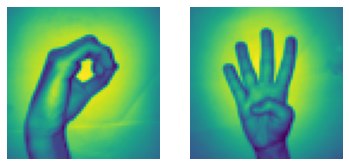

Labels corresponding to figures: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [2]:
digitsX = np.load('./data/Sign-language-digits-dataset/X.npy')
digitsY = np.load('./data/Sign-language-digits-dataset/Y.npy')
K = digitsX.shape[0]
img_size = digitsX.shape[1]
digitsX_flatten = digitsX.reshape(K,img_size*img_size)

print('Size of Input Data Matrix:', digitsX.shape)
print('Size of Flattned Input Data Matrix:', digitsX_flatten.shape)
print('Size of label Data Matrix:', digitsY.shape)
selected = [260, 1400]
plt.subplot(1, 2, 1), plt.imshow(digitsX[selected[0]].reshape(img_size, img_size)), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(digitsX[selected[1]].reshape(img_size, img_size)), plt.axis('off')
plt.show()
print('Labels corresponding to figures:', digitsY[selected,])

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dataset = 'digits'

#Joint normalization of all data. For images [-.5, .5] scaling is frequent
min_max_scaler = MinMaxScaler(feature_range=(-.5, .5))
X = min_max_scaler.fit_transform(digitsX_flatten)

#Generate train and validation data, shuffle
X_train, X_val, y_train, y_val = train_test_split(X, digitsY, test_size=0.2, random_state=42, shuffle=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[5, 10, 30, 50]}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 30, 50]})

In [8]:
print(clf.best_params_)
print(clf.score(X_val, y_val))

{'n_neighbors': 5}
0.576271186440678


In [34]:
from sklearn.neural_network import MLPClassifier
parameters = {'activation':('relu', 'tanh'), 'max_iter':[2000, 4000], 'hidden_layer_sizes': ((200,40), (200,100), (200,60, 25))}
MLP = MLPClassifier()
clf = GridSearchCV(MLP, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('relu', 'tanh'),
                         'hidden_layer_sizes': ((200, 40), (200, 100),
                                                (200, 60, 25)),
                         'max_iter': [2000, 4000]})

In [35]:
print(clf.best_params_)
print(clf.score(X_val, y_val))

{'activation': 'tanh', 'hidden_layer_sizes': (200, 60, 25), 'max_iter': 2000}
0.774818401937046


## Problema Dogs vs Cats

Size of Input Data Matrix: (25000, 64, 64)
Size of Flattned Input Data Matrix: (25000, 4096)
Size of label Data Matrix: (25000,)


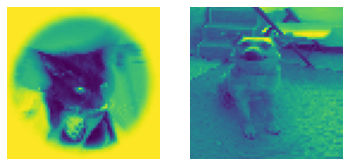

Labels corresponding to figures: [0. 1.]


In [2]:
DogsCatsX = np.load('./data/DogsCats/X.npy')
DogsCatsY = np.load('./data/DogsCats/Y.npy')
K = DogsCatsX.shape[0]
img_size = DogsCatsX.shape[1]
DogsCatsX_flatten = DogsCatsX.reshape(K,img_size*img_size)

print('Size of Input Data Matrix:', DogsCatsX.shape)
print('Size of Flattned Input Data Matrix:', DogsCatsX_flatten.shape)
print('Size of label Data Matrix:', DogsCatsY.shape)
selected = [260, 16000]
plt.subplot(1, 2, 1), plt.imshow(DogsCatsX[selected[0]].reshape(img_size, img_size)), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(DogsCatsX[selected[1]].reshape(img_size, img_size)), plt.axis('off')
plt.show()
print('Labels corresponding to figures:', DogsCatsY[selected,])

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dataset = 'DogsCats'
#dataset = 'digits'

if dataset=='DogsCats':
    X = DogsCatsX_flatten
    y = DogsCatsY
    
else:
    #Zero and Ones are one hot encoded in columns 1 and 4
    X0 = digitsX_flatten[np.argmax(digitsY, axis=1)==1,]
    X1 = digitsX_flatten[np.argmax(digitsY, axis=1)==4,]
    X = np.vstack((X0, X1))
    y = np.zeros(X.shape[0])
    y[X0.shape[0]:] = 1
    
#Joint normalization of all data. For images [-.5, .5] scaling is frequent
min_max_scaler = MinMaxScaler(feature_range=(-.5, .5))
X = min_max_scaler.fit_transform(X)

#Generate train and validation data, shuffle
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

parameters = {'activation':('relu', 'tanh'), 'max_iter':[2000, 4000], 'hidden_layer_sizes': ((400,100), (400,200), (200,100))}
MLP = MLPClassifier()
clf = GridSearchCV(MLP, parameters, verbose=100)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000 ...
[CV]  activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000, score=0.622, total= 3.5min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
[CV] activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000 ...
[CV]  activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000, score=0.645, total= 3.6min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s
[CV] activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000 ...
[CV]  activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000, score=0.636, total= 3.6min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.7min remaining:    0.0s
[CV] activation=relu, hidden_layer_sizes=(400, 100), max_iter=2000 ...
[CV]  activation=relu, hidden_layer_sizes=(400

[CV]  activation=tanh, hidden_layer_sizes=(400, 100), max_iter=2000, score=0.568, total= 2.9min
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 98.7min remaining:    0.0s
[CV] activation=tanh, hidden_layer_sizes=(400, 100), max_iter=2000 ...
[CV]  activation=tanh, hidden_layer_sizes=(400, 100), max_iter=2000, score=0.578, total= 3.1min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 101.9min remaining:    0.0s
[CV] activation=tanh, hidden_layer_sizes=(400, 100), max_iter=4000 ...
[CV]  activation=tanh, hidden_layer_sizes=(400, 100), max_iter=4000, score=0.559, total= 3.1min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 105.0min remaining:    0.0s
[CV] activation=tanh, hidden_layer_sizes=(400, 100), max_iter=4000 ...
[CV]  activation=tanh, hidden_layer_sizes=(400, 100), max_iter=4000, score=0.588, total= 2.9min
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 107.9min remaining:    0.0s
[CV] activation=tanh, hidden_layer_sizes=(400, 100), max_iter=4000 ...
[CV]  act

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('relu', 'tanh'),
                         'hidden_layer_sizes': ((400, 100), (400, 200),
                                                (200, 100)),
                         'max_iter': [2000, 4000]},
             verbose=100)

In [9]:
print(clf.best_params_)
print(clf.score(X_val, y_val))

{'activation': 'relu', 'hidden_layer_sizes': (400, 100), 'max_iter': 2000}
0.6292


In [21]:
parameters = {'n_neighbors':[100, 200, 500]}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters, verbose=100)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.596, total= 8.9min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.9min remaining:    0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.584, total= 7.9min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.8min remaining:    0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.605, total= 7.9min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 24.7min remaining:    0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.600, total= 7.8min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [100, 200, 500]}, verbose=100)

In [22]:
print(clf.best_params_)
print(clf.score(X_val, y_val))

{'n_neighbors': 200}
0.613


In [23]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)

In [24]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.680396,0.431244,476.406825,24.589996,100,{'n_neighbors': 100},0.59625,0.58350,0.60450,0.60025,0.60525,0.59795,0.007914,3
1,7.930005,1.198944,487.381031,31.625387,200,{'n_neighbors': 200},0.60075,0.59250,0.61775,0.60225,0.60050,0.60275,0.008239,1
2,9.448115,1.044935,584.806466,14.896875,500,{'n_neighbors': 500},0.60525,0.58775,0.60425,0.61375,0.60000,0.60220,0.008492,2
